# Violin Plot

Violin plots are somewhat a combination of a box plot and a kernel density curve. At minimum, they show the density estimation of data. However, they are regularly added with information from a box plot like mean, median, IQR, distribution min/max, etc. Violin plots are useful to compare distributions of multiple numeric columns.

## Load data

Like most other tutorials, we use the `auto-mpg` data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/auto-mpg.csv')
data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,1970,North America,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,North America,buick skylark 320


## Basic violin plots

Violin plots are only available in matplotlib and seaborn. The most basic type of violin plots can be drawn with matplotlib `violinplot()`

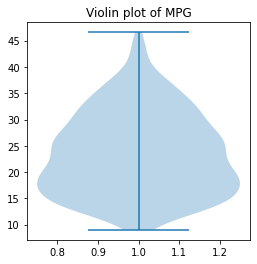

In [2]:
column = 'mpg'
title = 'Violin plot of MPG'

plt.figure(figsize=(4,4))
plt.violinplot(
    data[column],
)
plt.title(title)
plt.show()

Adjustments like changing colors or line size are quite complicated so we won't do that here. Instead, we can add components like mean, median, quantiles, outliers, etc. 

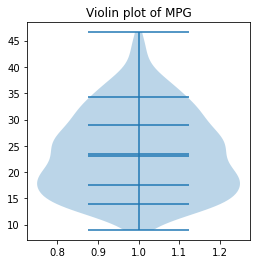

In [3]:
column = 'mpg'
title = 'Violin plot of MPG'
quantiles = [0.1, 0.25, 0.75, 0.9]

plt.figure(figsize=(4,4))
plt.violinplot(
    data[column],
    showmeans=True,
    showmedians=True,
    showextrema=True,
    quantiles=quantiles
)
plt.title(title)
plt.show()

Finally, we can input a 2D array or a dataframe to have the violin plots of multiple columns. And this is about the last simple thing to de with violin plots in matplotlib

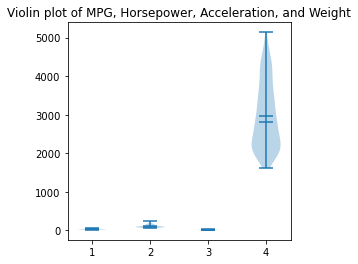

In [4]:
columns = ['mpg', 'horsepower', 'acceleration', 'weight']
title = 'Violin plot of MPG, Horsepower, Acceleration, and Weight'

plt.figure(figsize=(4,4))
plt.violinplot(
    data[columns],
    showmeans=True,
    showmedians=True,
    showextrema=True
)
plt.title(title)
plt.show()

And with the scaled data

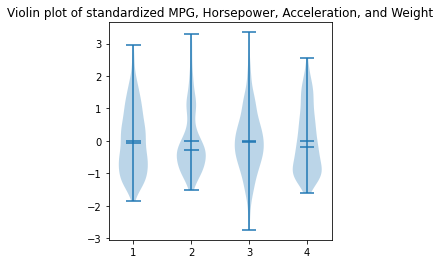

In [5]:
columns = ['mpg', 'horsepower', 'acceleration', 'weight']
title = 'Violin plot of standardized MPG, Horsepower, Acceleration, and Weight'

data_scaled = (data[columns] - data[columns].mean())/data[columns].std()
plt.figure(figsize=(4,4))
plt.violinplot(
    data_scaled,
    showmeans=True,
    showmedians=True,
    showextrema=True
)
plt.title(title)
plt.show()

## Using seaborn

Seaborn provides a much easier API to works with violin plots. The basic plot can be drawn with `seaborn.violinplot()`

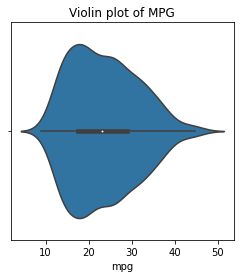

In [6]:
import seaborn as sn

column = 'mpg'
title = 'Violin plot of MPG'

plt.figure(figsize=(4,4))
sn.violinplot(
    data=data,
    x=column
)
plt.title(title)
plt.show()

With some adjustments to improve presentation

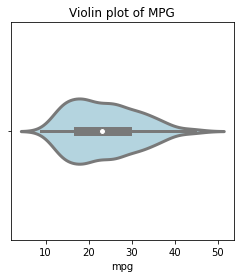

In [7]:
column = 'mpg'
title = 'Violin plot of MPG'

plt.figure(figsize=(4,4))
sn.violinplot(
    data=data,
    x=column,
    color='lightblue',
    linewidth=3,
    width=0.3
)
plt.title(title)
plt.show()

To draw violin plots for multiple columns, we can slice them and input the result to `violinplot()`. One note is that scale must be set to width for the violins to show

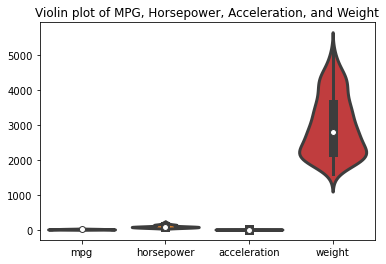

In [8]:
columns = ['mpg', 'horsepower', 'acceleration', 'weight']
title = 'Violin plot of MPG, Horsepower, Acceleration, and Weight'

plt.figure(figsize=(6,4))
sn.violinplot(
    data=data[columns],
    scale='width',
    linewidth=3,
)
plt.title(title)
plt.show()

Scaling data would usually yield better results when comparing across columns

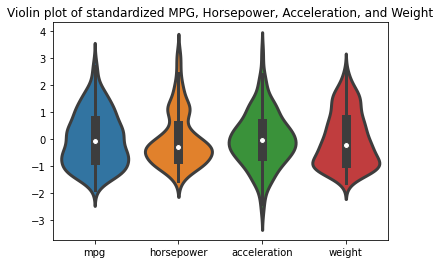

In [9]:
columns = ['mpg', 'horsepower', 'acceleration', 'weight']
title = 'Violin plot of standardized MPG, Horsepower, Acceleration, and Weight'

data_scaled = (data[columns] - data[columns].mean())/data[columns].std()
plt.figure(figsize=(6,4))
sn.violinplot(
    data=data_scaled,
    scale='width',
    linewidth=3,
)
plt.title(title)
plt.show()

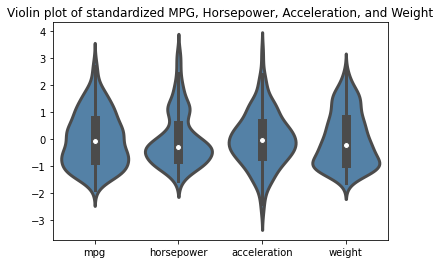

In [10]:
columns = ['mpg', 'horsepower', 'acceleration', 'weight']
title = 'Violin plot of standardized MPG, Horsepower, Acceleration, and Weight'

data_scaled = (data[columns] - data[columns].mean())/data[columns].std()
plt.figure(figsize=(6,4))
sn.violinplot(
    data=data_scaled,
    scale='width',
    color='steelblue',
    linewidth=3,
)
plt.title(title)
plt.show()

### Stratified violin plots

We can add a stratifying categorical column to compare the distributions of numerical columns among its classes. The numeric and categorical columns are interchangeable in `x=` and `y=` which decide if the plots are vertical or horizontal

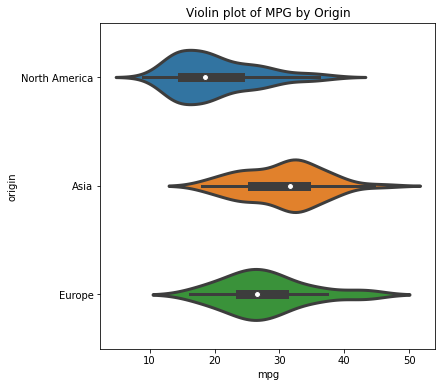

In [11]:
column = 'mpg'
category = 'origin'
title = 'Violin plot of MPG by Origin'

plt.figure(figsize=(6,6))
sn.violinplot(
    data=data,
    x=column,
    y=category,
    linewidth=3,
    width=0.5
)
plt.title(title)
plt.show()

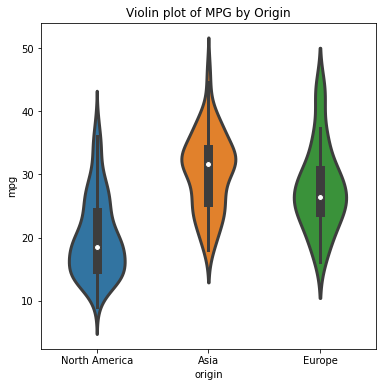

In [12]:
column = 'mpg'
category = 'origin'
title = 'Violin plot of MPG by Origin'

plt.figure(figsize=(6,6))
sn.violinplot(
    data=data,
    x=category,
    y=column,
    linewidth=3,
    width=0.5
)
plt.title(title)
plt.show()

We can stratify the violins by another categorical column with `hue=`

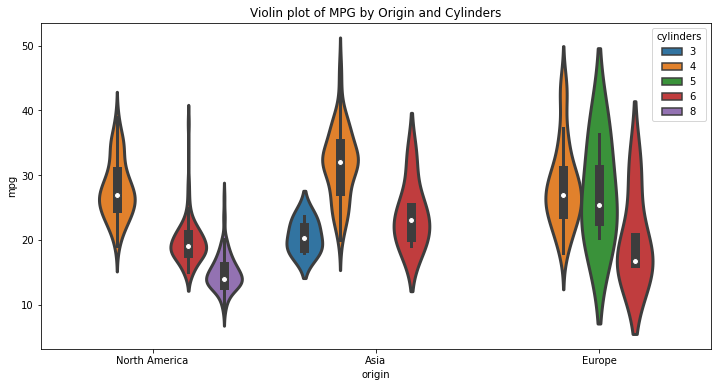

In [13]:
column = 'mpg'
axis_category = 'origin'
color_category = 'cylinders'
title = 'Violin plot of MPG by Origin and Cylinders'

plt.figure(figsize=(12,6))
sn.violinplot(
    data=data,
    x=axis_category,
    y=column,
    hue=color_category,
    linewidth=3,
    scale='width'
)
plt.title(title)
plt.show()

Finally, we can stratify the distributions of multiple columns by a categorical one. However, this needs some reshaping with pandas

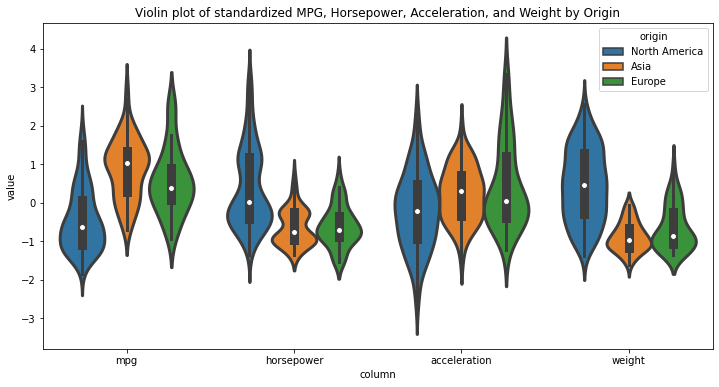

In [14]:
columns = ['mpg', 'horsepower', 'acceleration', 'weight']
category = 'origin'
title = 'Violin plot of standardized MPG, Horsepower, Acceleration, and Weight by Origin'

data_cols = data[columns].copy()
data_cols = (data[columns] - data[columns].mean())/data[columns].std()
data_cols[category] = data[category]
data_cols_long = data_cols.melt(id_vars=category, var_name='column', value_name='value')
plt.figure(figsize=(12,6))
sn.violinplot(
    data=data_cols_long,
    x='column',
    y='value',
    hue=category,
    scale='width',
    linewidth=3,
)
plt.title(title)
plt.show()